<a href="https://colab.research.google.com/github/jake314jake/facial-recognition/blob/main/EvalDeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_lfw_pairs

# Fetch the LFW pairs dataset
lfw_pairs = fetch_lfw_pairs(subset='test', # Can be 'train', 'test', or '10_folds'
                            color=True,     # Fetch images in color (RGB)
                            slice_=None,    # Slice to consider (top, bottom, left, right)
                            resize=0.5,     # Resize factor
                            download_if_missing=True)  # Download if not present

# Access the images and labels
pairs = lfw_pairs.pairs  # this is a numpy array of images
target = lfw_pairs.target  # 1 if the pair is of the same person, 0 otherwise

# Example of using the data
print("Number of pairs:", pairs.shape[0])
print("Each image shape:", pairs.shape[2:], " (after resizing)")
print("First 5 targets:", target[:5])


Number of pairs: 1000
Each image shape: (125, 125, 3)  (after resizing)
First 5 targets: [1 1 1 1 1]


In [ ]:
Spairs, Starget = shuffle(pairs, target, random_state=42)
print("First 5 targets:", Starget[1000:2000])

First 5 targets: [1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1

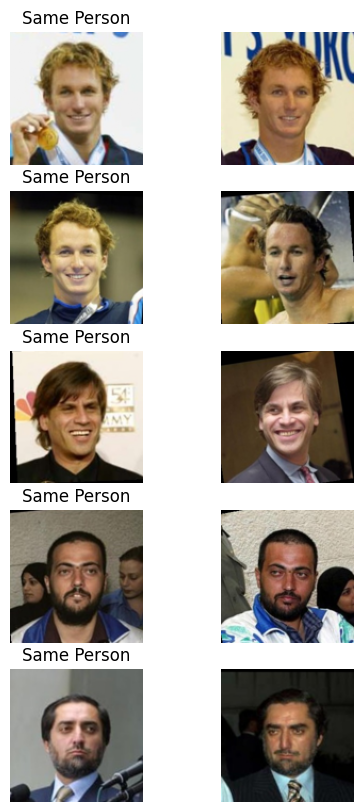

In [ ]:
# Function to plot pairs of images
import matplotlib.pyplot as plt
def plot_pairs(images, labels, num_pairs=5):
    fig, axes = plt.subplots(num_pairs, 2, figsize=(5, 2 * num_pairs))
    for i, (row, label) in enumerate(zip(images[:num_pairs], labels[:num_pairs])):
        for j in range(2):
            ax = axes[i, j]
            ax.imshow(row[j], cmap='gray')
            ax.axis('off')
        axes[i, 0].set_title('Same Person' if label == 1 else 'Different People')
    plt.show()

# Plot some pairs
plot_pairs(pairs, target, num_pairs=5)

In [ ]:
pip install deepface

In [6]:
import numpy as np
import os
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import fetch_lfw_pairs
from sklearn.utils import shuffle
from deepface import DeepFace

# Directory to save images
os.makedirs('lfw_images', exist_ok=True)

# Load LFW pairs
lfw_pairs = fetch_lfw_pairs(subset='train', # Can be 'train', 'test', or '10_folds'
                            color=True,     # Fetch images in color (RGB)
                            slice_=None,    # Slice to consider (top, bottom, left, right)
                            resize=0.5,     # Resize factor
                            download_if_missing=True)  # Download if not present
pairs = lfw_pairs.pairs
targets = lfw_pairs.target

# Shuffle pairs and targets
pairs, targets = shuffle(pairs, targets, random_state=23)
pairs = pairs[:100]  # Use only the first 100 shuffled pairs
targets = targets[:100]

# Save the pairs to disk and create a list of paths
image_paths = []
for i, (img1, img2) in enumerate(pairs):
    path1 = f'lfw_images/img1_{i}.png'
    path2 = f'lfw_images/img2_{i}.png'
    Image.fromarray((img1 * 255).astype(np.uint8)).save(path1)
    Image.fromarray((img2 * 255).astype(np.uint8)).save(path2)
    image_paths.append((path1, path2))

# Define the models and distance metrics to evaluate
models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepID", "ArcFace"
]
distance_metrics = ["cosine", "euclidean", "euclidean_l2"]

# Initialize dictionary to store performance results
performance_results = {}

# Iterate over each model and distance metric
for model in models:
    for distance_metric in distance_metrics:
        predictions = []
        distances = []

        for i, (path1, path2) in enumerate(image_paths):
            # Verify the pair with the current model and distance metric
            result = DeepFace.verify(path1, path2, model_name=model, detector_backend='yunet',
                                     distance_metric=distance_metric, enforce_detection=False, silent=True)
            print(f"{model} using {distance_metric} metric, pair {i}")

            # Store if verified (converted to integer) and distance
            predictions.append(int(result['verified']))
            distances.append(result['distance'])

        # Calculate metrics
        acc = accuracy_score(targets, predictions)
        prec = precision_score(targets, predictions)
        rec = recall_score(targets, predictions)

        # Store results for the current model and distance metric
        key = f"{model} with {distance_metric}"
        performance_results[key] = {
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'average_distance': np.mean(distances)
        }

# Print all results
for key, metrics in performance_results.items():
    print(f"Results for {key}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()  # Newline for better readability


HTTPError: HTTP Error 403: Forbidden

In [ ]:
plot_pairs(pairs, targets, num_pairs=5)

NameError: name 'plot_pairs' is not defined

In [ ]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",

  "DeepID",
  "ArcFace",

  "SFace",
  "GhostFaceNet",
]

result = DeepFace.verify(pairs[2][0], pairs[2][1], model_name="Facenet",
                                      enforce_detection=True , silent = False)
print(result)

ValueError: Exception while processing img1_path

In [ ]:
pairs[2][0].shape

(125, 125, 3)

In [ ]:
import logging

# Setup basic configuration for logging
logging.basicConfig(level=logging.INFO)  # INFO level will not show warnings by default

logger = logging.getLogger()

# This will show in the cell output
logger.warning('This is a warning message')


In [ ]:
!rm -r "/content/lfw_images"